Machine Learning for Image Classification
===

We will use K-NN and SVM on MNIST and Fashion-MNIST Dataset




# k-Nearest Neighbors

kNN is a simple machine learning algorithm that depends on distances among data points for classification. The distances are usually measured using either Manhattan distance or Euclidean distance.

## The MNIST Dataset

We load the MNIST dataset using `cv2.imread()`.

In [64]:
import cv2
import numpy as np

In [65]:
# load the dataset
mnist = cv2.imread('./datasets/digits.png', 0)

In [66]:
features = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)

In [67]:
features.shape

(50, 100, 20, 20)

In [68]:
# for visualization
import matplotlib.pyplot as plt

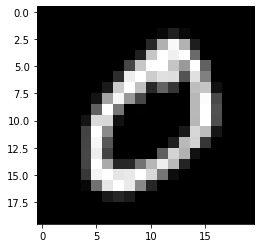

In [69]:
plt.imshow(features[0, 0], cmap='gray')
plt.show()

## Dataset Partition

Split the dataset to 50-50 for arithmetic convenience.

In [70]:
train_features = features[:, :50].reshape(-1, (20 * 20))
test_features = features[:, 50:100].reshape(-1, (20 * 20))

In [71]:
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

## The kNN Model

Let's create the kNN model using `cv2.ml.KNearest_create()`.

In [72]:
model = cv2.ml.KNearest_create()

### Training the kNN

When it's actually just memorizing the data points.

In [73]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the trained kNN

Classify test features using trained kNN model.

In [74]:
# use k = 3
ret, result, neighbors, dist = model.findNearest(test_features, 3)

### Measure Model Accuracy

Get the test accuracy of the trained kNN model.

In [75]:
# check if the results are correct
matches = np.equal(result, test_labels)

# convert bool to int
matches = matches.astype(np.int)

# count the correct predictions
correct = np.count_nonzero(matches)

# compute the accuracy
accuracy = (correct * 100.00) / result.size

In [76]:
# print('Matches : {}'.format(matches))
print('Correct : {}'.format(correct))
print('Accuracy : {}'.format(accuracy))

Correct : 2291
Accuracy : 91.64


## The Fashion-MNIST Dataset

The Fashion-MNIST dataset was introduced as an alternative to MNIST. The Fashion-MNIST dataset we have has 30 images per row, and 30 images per column.

In [77]:
# load the dataset
fashion = cv2.imread('./datasets/fashion.png', 0)

In [78]:
fashion.shape

(840, 840)

With the `840x840` size of the dataset, and `30x30` images in the dataset, we have each image at `28x28` pixels.

In [79]:
features = np.array([np.hsplit(row, 30) for row in np.vsplit(fashion, 30)], dtype=np.float32)

In [80]:
features.shape

(30, 30, 28, 28)

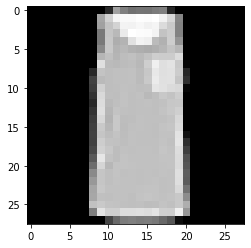

In [81]:
plt.imshow(features[0, 0], cmap='gray')
plt.show()

## Dataset Partition

Split the dataset to 50-50 for arithmetic convenience.

In [82]:
train_features = features[:, :15].reshape(-1, (28 * 28))
test_features = features[:, 15:30].reshape(-1, (28 * 28))

In [83]:
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

## The kNN Model

Let's create the kNN model using `cv2.ml.KNearest_create()`.

In [84]:
model = cv2.ml.KNearest_create()

### Training the kNN

When it's actually just memorizing the data points.

In [85]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the trained kNN

Classify test features using trained kNN model.

In [86]:
# use k = 3, other values of k can be used.
ret, result, neighbors, dist = model.findNearest(test_features, 3)

### Measure Model Accuracy

Get the test accuracy of the trained kNN model.

In [87]:
# check if the results are correct
matches = np.equal(result, test_labels)

# convert bool to int
matches = matches.astype(np.int)

# count the correct predictions
correct = np.count_nonzero(matches)

# compute the accuracy
accuracy = (correct * 100.00) / result.size

In [88]:
# print('Matches : {}'.format(matches))
print('Correct : {}'.format(correct))
print('Accuracy : {}'.format(accuracy))

Correct : 319
Accuracy : 70.88888888888889


# Support Vector Machine

Finds the hyperplane which best separates the dataset into  two classes.

## The MNIST Dataset

In [89]:
# load the dataset
mnist = cv2.imread('./datasets/digits.png', 0)

In [90]:
features = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype=np.float32)

In [91]:
features.shape

(50, 100, 20, 20)

## Dataset Partition

Split the dataset to 50-50 for arithmetic convenience.

In [92]:
train_features = features[:, :50].reshape(-1, (20 * 20))
test_features = features[:, 50:100].reshape(-1, (20 * 20))

In [93]:
k = np.arange(10)
train_labels = np.repeat(k, 250).reshape(-1, 1)
test_labels = train_labels.copy()

## The SVM Model

In [94]:
model = cv2.ml.SVM_create()

In [95]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

### Training the SVM

In [96]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the Trained SVM

In [97]:
result = model.predict(test_features)

### Measure Model Accuracy

Get the test accuracy of the trained SVM model.

In [98]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

In [99]:
# print('Matches : {}'.format(matches))
print('Correct : {}'.format(correct))
print('Accuracy : {}'.format(accuracy))

Correct : 2261
Accuracy : 90.44


## The Fashion-MNIST Dataset

The Fashion-MNIST dataset was introduced as an alternative to MNIST. The Fashion-MNIST dataset we have has 30 images per row, and 30 images per column.

In [100]:
# load the dataset
fashion = cv2.imread('./datasets/fashion.png', 0)

In [101]:
fashion.shape

(840, 840)

With the `840x840` size of the dataset, and `30x30` images in the dataset, we have each image at `28x28` pixels.

In [102]:
features = np.array([np.hsplit(row, 30) for row in np.vsplit(fashion, 30)], dtype=np.float32)

In [103]:
features.shape

(30, 30, 28, 28)

## Dataset Partition

Split the dataset to 50-50 for arithmetic convenience.

In [104]:
train_features = features[:, :15].reshape(-1, (28 * 28))
test_features = features[:, 15:30].reshape(-1, (28 * 28))

In [105]:
k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

## The SVM Model

In [106]:
model = cv2.ml.SVM_create()

In [107]:
model.setKernel(cv2.ml.SVM_LINEAR)
model.setC(2.67)
model.setGamma(5.383)
model.setType(cv2.ml.SVM_C_SVC)

### Training the SVM

In [108]:
model.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the Trained SVM

In [109]:
result = model.predict(test_features)

### Measure Model Accuracy

Get the test accuracy of the trained SVM model.

In [110]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

In [111]:
# print('Matches : {}'.format(matches))
print('Correct : {}'.format(correct))
print('Accuracy : {}'.format(accuracy))

Correct : 336
Accuracy : 74.66666666666667
